#EV CAR Sales  across the world 2010 FROM 2024
The chart below shows the total number of new electric cars sold. Again, this includes fully battery-electric and plug-in hybrids.
https://ourworldindata.org/electric-car-sales

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
EV_solds= pd.read_csv("C:/Users/nainy/Documents/nss_dda16/python/projects/EV_Capstone_project_nainy/data/electric-car-sales.csv")

In [26]:
EV_solds= EV_solds.rename(columns={'Entity':'Country_Name'})
EV_solds

,Country_Name,Code,Year,Electric cars sold
0,Australia,AUS,2012,250
1,Australia,AUS,2013,290
2,Australia,AUS,2014,1320
3,Australia,AUS,2015,1760
4,Australia,AUS,2016,1370
...,...,...,...,...
438,World,OWID_WRL,2020,2970000
439,World,OWID_WRL,2021,6600000
440,World,OWID_WRL,2022,10200000
441,World,OWID_WRL,2023,13700000


In [28]:
EV_solds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_Name        443 non-null    object
 1   Code                399 non-null    object
 2   Year                443 non-null    int64 
 3   Electric cars sold  443 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.0+ KB


In [103]:
total_ev_sales_by_country_2020_to_2024 = EV_solds.groupby('Country_Name')['Electric cars sold'].sum().sort_values(ascending = False)
total_ev_sales_by_country_2020_to_2024.reset_index()

,Country_Name,Electric cars sold
0,World,58305450
1,China,33075150
2,Europe,14531420
3,European Union (27),10656151
4,United States,6263800
5,Germany,3481340
6,United Kingdom,2134238
7,France,1991538
8,Norway,960560
9,Netherlands,847767


In [54]:
United_States_sales = EV_solds.loc[EV_solds['Country_Name']== 'United States']
United_States_sales =United_States_sales.reset_index()
United_States_sales

,index,Country_Name,Code,Year,Electric cars sold
0,414,United States,USA,2011,17800
1,415,United States,USA,2012,54000
2,416,United States,USA,2013,97000
3,417,United States,USA,2014,118000
4,418,United States,USA,2015,114000
5,419,United States,USA,2016,160000
6,420,United States,USA,2017,194000
7,421,United States,USA,2018,360000
8,422,United States,USA,2019,325000
9,423,United States,USA,2020,294000


In [58]:
United_States_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               14 non-null     int64 
 1   Country_Name        14 non-null     object
 2   Code                14 non-null     object
 3   Year                14 non-null     int64 
 4   Electric cars sold  14 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 692.0+ bytes


C:\Users\nainy\AppData\Local\Temp\ipykernel_38660\3931271722.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


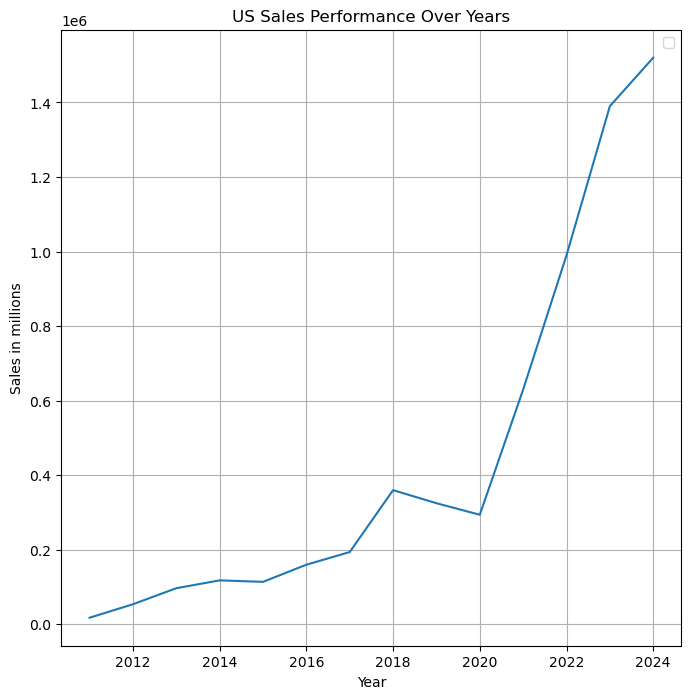

In [90]:
plt.figure(figsize=(8, 8))
sns.lineplot( x= 'Year', y = 'Electric cars sold', data =United_States_sales)
#plt.plot( data = United_States_sales, x= 'Year', y = 'Electric cars sold', marker='o', linestyle='', markersize=10, color='blue', markeredgecolor='red')
plt.title('US Sales Performance Over Years')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
EV_solds

,Country_Name,Code,Year,Electric cars sold
0,Australia,AUS,2012,250
1,Australia,AUS,2013,290
2,Australia,AUS,2014,1320
3,Australia,AUS,2015,1760
4,Australia,AUS,2016,1370
...,...,...,...,...
438,World,OWID_WRL,2020,2970000
439,World,OWID_WRL,2021,6600000
440,World,OWID_WRL,2022,10200000
441,World,OWID_WRL,2023,13700000


In [ ]:
#3. Yearly EV sales trend for a country

In [113]:
EV_solds.loc[EV_solds["Country_Name"] == 'Australia'][["Year", "Electric cars sold"]].sort_values("Year")

,Year,Electric cars sold
0,2012,250
1,2013,290
2,2014,1320
3,2015,1760
4,2016,1370
5,2017,2300
6,2018,3600
7,2019,9200
8,2020,6900
9,2021,20400


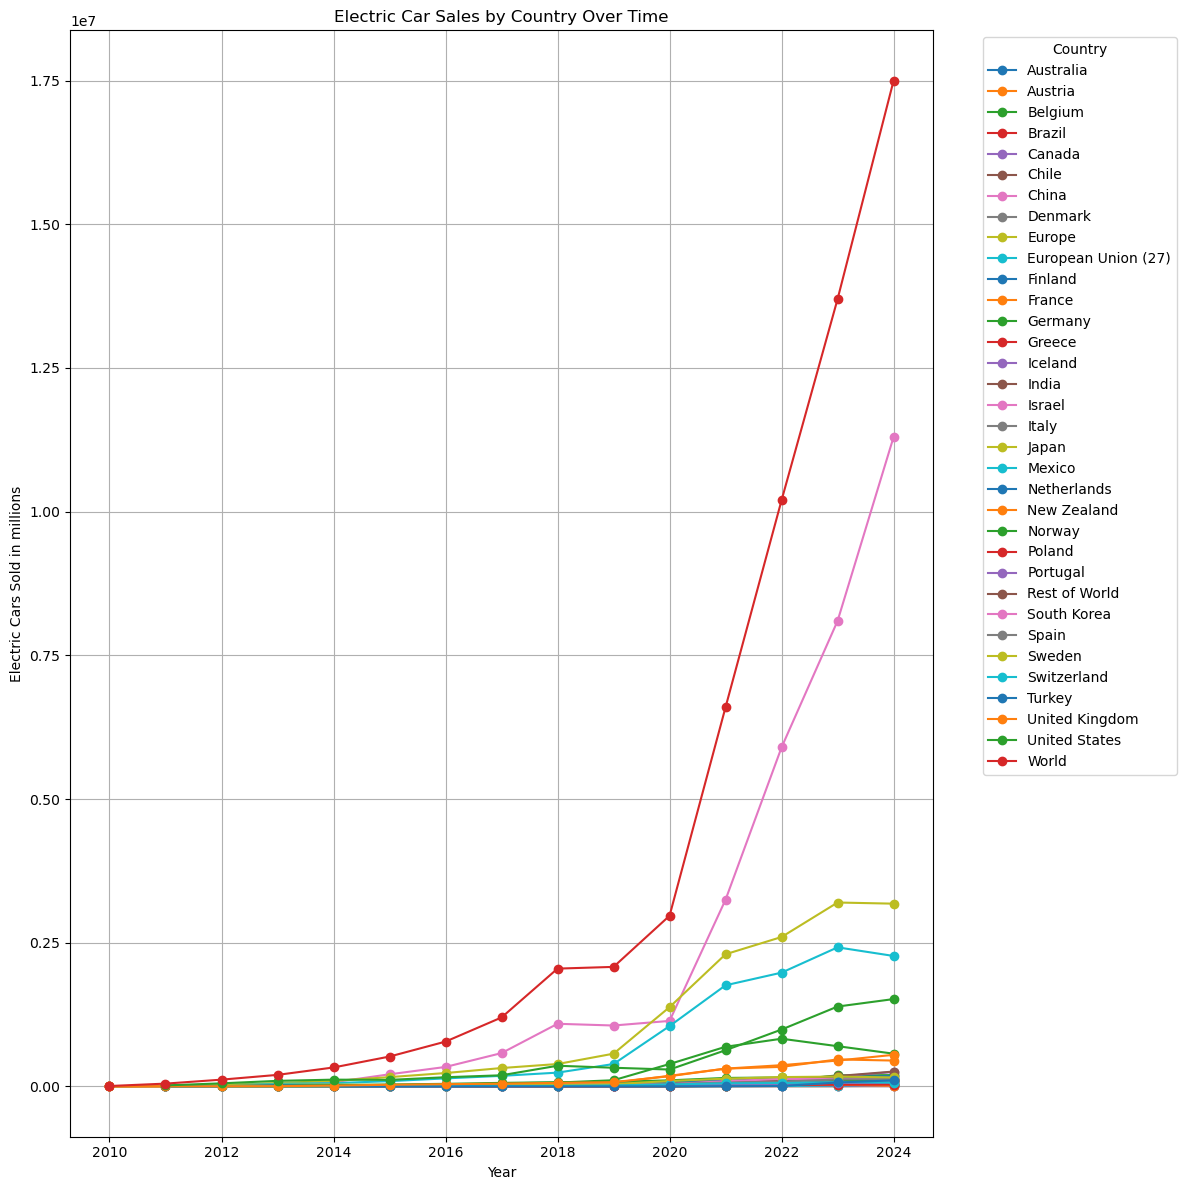

In [119]:

# Pivot for multi-country trend lines
pivot_df = EV_solds.pivot(index="Year", columns="Country_Name", values="Electric cars sold")

# Plot
plt.figure(figsize=(12, 12))
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)

plt.title("Electric Car Sales by Country Over Time")
plt.xlabel("Year")
plt.ylabel("Electric Cars Sold in millions")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Sales of EV and NON EV sales around the world

In [129]:
EV_vs_Non_EV_sales= pd.read_csv("C:/Users/nainy/Documents/nss_dda16/python/projects/EV_Capstone_project_nainy/data/car-sales.csv")

In [131]:
EV_vs_Non_EV_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Entity                  443 non-null    object
 1   Code                    399 non-null    object
 2   Year                    443 non-null    int64 
 3   Electric cars sold      443 non-null    int64 
 4   Non-electric car sales  443 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.4+ KB


In [133]:
EV_vs_Non_EV_sales.head(4)

,Entity,Code,Year,Electric cars sold,Non-electric car sales
0,Australia,AUS,2012,250,861819
1,Australia,AUS,2013,290,878498
2,Australia,AUS,2014,1320,878680
3,Australia,AUS,2015,1760,924556


In [139]:
EV_vs_Non_EV_sales= EV_vs_Non_EV_sales.rename(columns ={'Entity':'Country_name'})

In [141]:
EV_vs_Non_EV_sales

,Country_name,Code,Year,Electric cars sold,Non-electric car sales
0,Australia,AUS,2012,250,861819
1,Australia,AUS,2013,290,878498
2,Australia,AUS,2014,1320,878680
3,Australia,AUS,2015,1760,924556
4,Australia,AUS,2016,1370,911963
...,...,...,...,...,...
438,World,OWID_WRL,2020,2970000,64530000
439,World,OWID_WRL,2021,6600000,64367742
440,World,OWID_WRL,2022,10200000,57800000
441,World,OWID_WRL,2023,13700000,62411111


In [143]:
global_sales = EV_vs_Non_EV_sales.groupby("Year")[["Electric cars sold", "Non-electric car sales"]].sum().reset_index()

In [145]:
global_sales

,Year,Electric cars sold,Non-electric car sales
0,2010,12496,108631862
1,2011,113036,142901853
2,2012,283294,143059356
3,2013,508742,150327450
4,2014,807163,158579298
5,2015,1296869,173324203
6,2016,1927870,181141410
7,2017,2885756,181639605
8,2018,4694911,180847432
9,2019,5148776,176293037


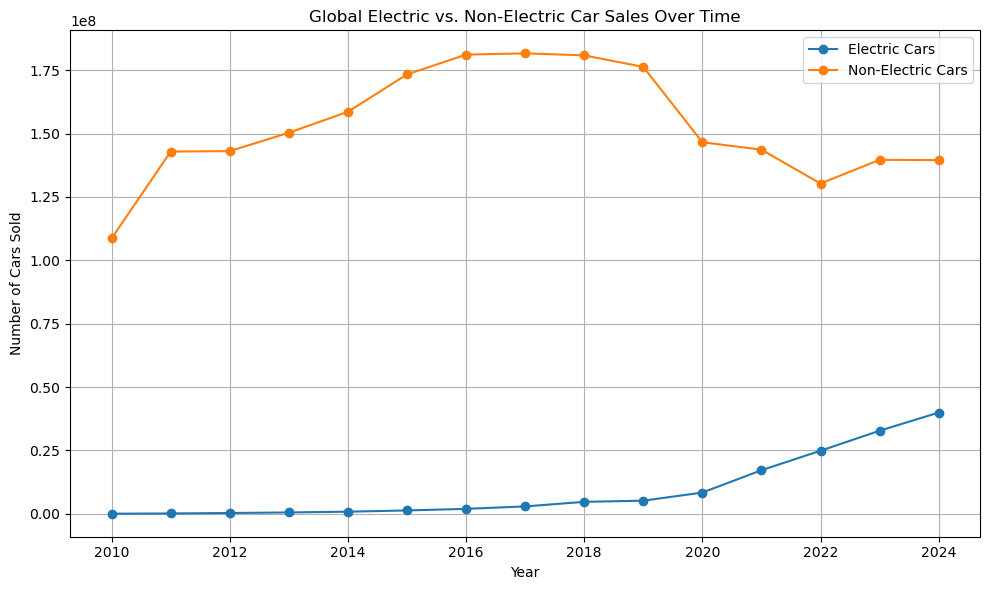

In [147]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(global_sales["Year"], global_sales["Electric cars sold"], marker='o', label="Electric Cars")
plt.plot(global_sales["Year"], global_sales["Non-electric car sales"], marker='o', label="Non-Electric Cars")

plt.title("Global Electric vs. Non-Electric Car Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# LDV Total Sales of PEV and HEV by Month (updated through June 2025)

In [175]:
All_EV_sales= pd.read_csv("C:/Users/nainy/Documents/nss_dda16/python/projects/EV_Capstone_project_nainy/data/Total_Sales_for_EV_June_2025.csv")

In [181]:
All_EV_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      175 non-null    object
 1   BEV        175 non-null    object
 2   PHEV       175 non-null    object
 3   HEV        175 non-null    object
 4   Total LDV  175 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB


In [195]:

All_EV_sales.head(4)


,Month,BEV,PHEV,HEV,Total LDV
0,10-Dec,19,326,"28,592","1,144,840"
1,11-Jan,103,321,"19,540","819,938"
2,11-Feb,83,281,"23,306","993,535"
3,11-Mar,298,608,"34,533","1,246,668"


In [201]:
All_EV_sales['Month']= pd.to_datetime(All_EV_sales["Month"], format="%y-%b")

In [203]:
All_EV_sales

,Month,BEV,PHEV,HEV,Total LDV
0,2010-12-01,19,326,"28,592","1,144,840"
1,2011-01-01,103,321,"19,540","819,938"
2,2011-02-01,83,281,"23,306","993,535"
3,2011-03-01,298,608,"34,533","1,246,668"
4,2011-04-01,573,493,"25,602","1,157,928"
...,...,...,...,...,...
170,2025-02-01,"85,867","20,944","146,846","1,216,677"
171,2025-03-01,"117,882","35,518","193,384","1,591,072"
172,2025-04-01,"96,150","31,003","188,865","1,464,300"
173,2025-05-01,"101,857","25,452","192,226","1,462,511"


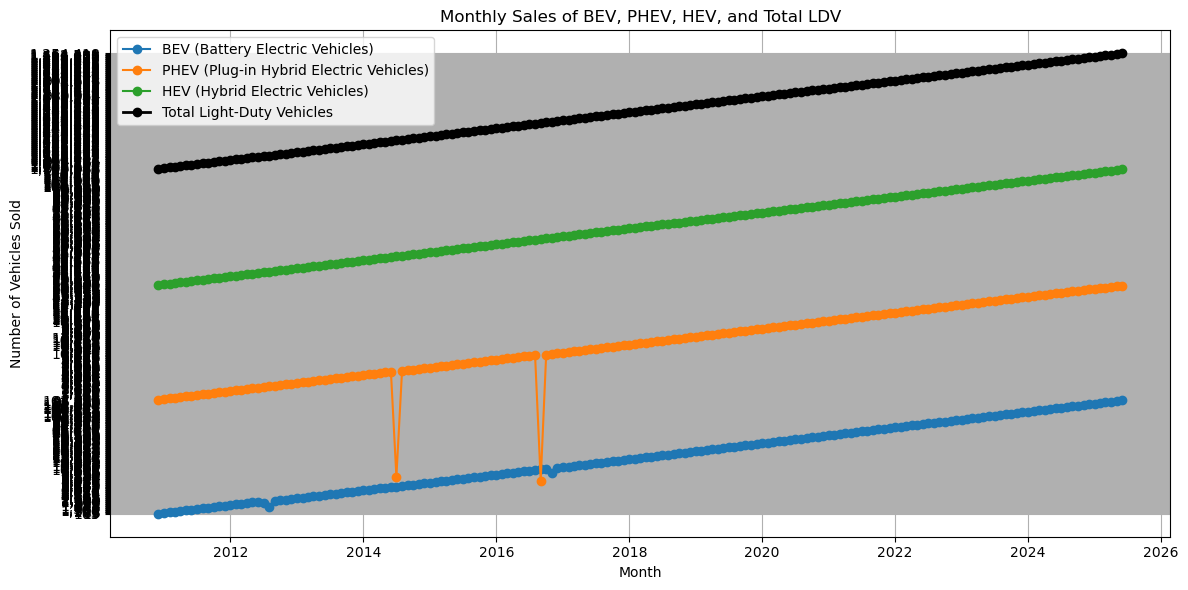

In [205]:
All_EV_sales["Month"] = pd.to_datetime(All_EV_sales["Month"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(All_EV_sales["Month"], All_EV_sales["BEV"], marker='o', label="BEV (Battery Electric Vehicles)")
plt.plot(All_EV_sales["Month"], All_EV_sales["PHEV"], marker='o', label="PHEV (Plug-in Hybrid Electric Vehicles)")
plt.plot(All_EV_sales["Month"], All_EV_sales["HEV"], marker='o', label="HEV (Hybrid Electric Vehicles)")
plt.plot(All_EV_sales["Month"], All_EV_sales["Total LDV"], marker='o', label="Total Light-Duty Vehicles", linewidth=2, color="black")

plt.title("Monthly Sales of BEV, PHEV, HEV, and Total LDV")
plt.xlabel("Month")
plt.ylabel("Number of Vehicles Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()